### Import packages

In [65]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Loading

In [66]:
dir_name = os.path.dirname("/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/")
print(os.listdir(dir_name))
!find $dir_name -type d -print

['validation', 'train', 'vectorize.py']
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/cats
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/cats


In [67]:
train_dir = os.path.join(dir_name, "train")
val_dir = os.path.join(dir_name, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")
val_dogs_dir = os.path.join(val_dir, "dogs")
val_dogs_dir

'/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs'

### Understanding the data

In [68]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

num_train = num_cats_train + num_dogs_train
num_val = num_cats_val + num_dogs_val

In [69]:
print(f"Total number of train data: {num_train}")
print(f"Total number of validation data: {num_val}")
print("---" * 15)
print(f"Total number of dogs train data: {num_dogs_train}")
print(f"Total number of cats train data: {num_cats_train}")
print("---" * 15)
print(f"Total number of dogs validation data: {num_dogs_val}")
print(f"Total number of cats validation data: {num_cats_val}")

Total number of train data: 2000
Total number of validation data: 1000
---------------------------------------------
Total number of dogs train data: 1000
Total number of cats train data: 1000
---------------------------------------------
Total number of dogs validation data: 500
Total number of cats validation data: 500


### Setting model parameters

In [70]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Augmentation

In [71]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (12, 3))
    axes = axes.flatten()
    for image, ax in zip(images_arr, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

### Flipping the images horizontally

In [74]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE)
                                              )

Found 2000 images belonging to 2 classes.


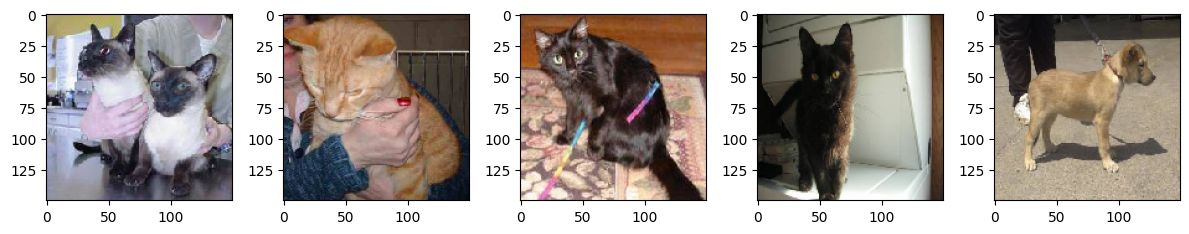

In [75]:
plot_images([train_data_gen[0][0][i] for i in range(5)])